In [1]:
import numpy as np
import sklearn
import os
import re
import pandas as pd
import matplotlib as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer

## Load dataset

In [85]:
OSF_train = pd.read_csv(os.path.abspath('./data/OSF.csv'), header=0) 
os_train = pd.read_csv(os.path.abspath('./data/oversampled.csv'), header=0) 
us_train = pd.read_csv(os.path.abspath('./data/undersampled.csv'), header=0) 
imbalanced = pd.read_csv(os.path.abspath('./test.csv'), header=0)
OSF_train.head()

,Review,Generated
0,"Love this! Well made, sturdy, and very comfor...",0
1,"love it, a great upgrade from the original. I...",0
2,This pillow saved my back. I love the look and...,0
3,"Missing information on how to use it, but it i...",0
4,Very nice set. Good quality. We have had the s...,0


### Convert to BOW feature representation

In [86]:
def process_review(review):
    return re.sub(r"[^a-zA-Z0-9]", " ", review.lower())

bow_vectorizer = CountVectorizer(stop_words='english', min_df=0.01, ngram_range=(1,2))

#### Process OSF training data

In [87]:
# Process training data
OSF_text = []
OSF_Y = []

for i in OSF_train.index:
    if(isinstance(OSF_train['Review'][i], float)):
        continue
    review_text = process_review(OSF_train['Review'][i])
    gen = OSF_train['Generated'][i]
    OSF_text.append(review_text)
    OSF_Y.append(gen)

# Create BOW from training data
OSF_X = bow_vectorizer.fit_transform(OSF_text)

print('Data shape: ', OSF_X.shape)

Data shape:  (40432, 426)


#### Process oversampled training data

In [88]:
# Process training data
os_text = []
os_Y = []

for i in os_train.index:
    if(isinstance(os_train['Review'][i], float)):
        continue
    review_text = process_review(os_train['Review'][i])
    gen = os_train['Generated'][i]
    os_text.append(review_text)
    os_Y.append(gen)

# Create BOW from training data
os_X = bow_vectorizer.fit_transform(os_text)

print('Data shape: ', os_X.shape)

Data shape:  (877266, 770)


#### Process undersampled training data

In [89]:
# Process training data
us_text = []
us_Y = []

for i in us_train.index:
    if(isinstance(us_train['Review'][i], float)):
        continue
    review_text = process_review(us_train['Review'][i])
    gen = us_train['Generated'][i]
    us_text.append(review_text)
    us_Y.append(gen)

# Create BOW from training data
us_X = bow_vectorizer.fit_transform(us_text)

print('Data shape: ', us_X.shape)

Data shape:  (161075, 770)


#### Process imbalanced training data

In [90]:
# Process training data
im_text = []
im_Y = []

for i in imbalanced.index:
    if(isinstance(imbalanced['Review'][i], float)):
        continue
    review_text = process_review(imbalanced['Review'][i])
    gen = imbalanced['Generated'][i]
    im_text.append(review_text)
    im_Y.append(gen)

# Create BOW from training data
im_X = bow_vectorizer.fit_transform(im_text)

print('Data shape: ', im_X.shape)

Data shape:  (129788, 869)


### Split data into train/test

In [91]:
# OSF dataset
OSF_Xtrain, OSF_Xtest, OSF_Ytrain, OSF_Ytest = train_test_split(OSF_X, OSF_Y, stratify=OSF_Y)

print('Number of OSF training examples: ', OSF_Xtrain.shape[0])
print('Number of OSF testing examples: ', OSF_Xtest.shape[0])

# Oversampled dataset
os_Xtrain, os_Xtest, os_Ytrain, os_Ytest = train_test_split(os_X, os_Y, stratify=os_Y)

print('Number of oversampled training examples: ', os_Xtrain.shape[0])
print('Number of oversampled testing examples: ', os_Xtest.shape[0])

# Undersampled dataset
us_Xtrain, us_Xtest, us_Ytrain, us_Ytest = train_test_split(us_X, us_Y, stratify=us_Y)

print('Number of undersampled training examples: ', us_Xtrain.shape[0])
print('Number of undersampled testing examples: ', us_Xtest.shape[0])

# Imbalanced dataset
im_Xtrain, im_Xtest, im_Ytrain, im_Ytest = train_test_split(im_X, im_Y, stratify=im_Y)

print('Number of imbalanced training examples: ', im_Xtrain.shape[0])
print('Number of imbalanced testing examples: ', im_Xtest.shape[0])

Number of OSF training examples:  30324
Number of OSF testing examples:  10108
Number of oversampled training examples:  657949
Number of oversampled testing examples:  219317
Number of undersampled training examples:  120806
Number of undersampled testing examples:  40269
Number of imbalanced training examples:  97341
Number of imbalanced testing examples:  32447


## Train logistic classifier

### OSF dataset

In [92]:
# Train logistic regression classifier
classifier = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, max_iter=1000)
classifier.fit(OSF_Xtrain, OSF_Ytrain)

# Compute and print accuracy on training data
lr_train_predictions = classifier.predict(OSF_Xtrain)
lr_train_accuracy = classifier.score(OSF_Xtrain, OSF_Ytrain)
print('Training accuracy:',format( 100*lr_train_accuracy , '.2f') ) 

# Compute and print accuracy on the test data
lr_test_predictions = classifier.predict(OSF_Xtest)
lr_test_accuracy = classifier.score(OSF_Xtest, OSF_Ytest)
print('Testing accuracy:',format( 100*lr_test_accuracy , '.2f') ) 

# Compute and print AUC on test data
class_probabilities = classifier.predict_proba(OSF_Xtest)[:,1]
test_auc_score = metrics.roc_auc_score(OSF_Ytest, class_probabilities)
print('AUC value:', format( 100*test_auc_score , '.2f') )

Training accuracy: 80.69
Testing accuracy: 79.97
AUC value: 89.00


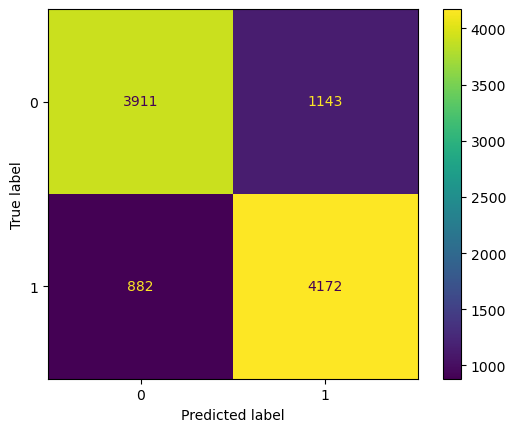

In [93]:
# Create and visualize confusion matrix
cm = metrics.confusion_matrix(OSF_Ytest, lr_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

### Oversampled dataset

In [94]:
# Train logistic regression classifier
classifier = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, max_iter=1000)
classifier.fit(os_Xtrain, os_Ytrain)

# Compute and print accuracy on training data
lr_train_predictions = classifier.predict(os_Xtrain)
lr_train_accuracy = classifier.score(os_Xtrain, os_Ytrain)
print('Training accuracy:',format( 100*lr_train_accuracy , '.2f') ) 

# Compute and print accuracy on the test data
lr_test_predictions = classifier.predict(os_Xtest)
lr_test_accuracy = classifier.score(os_Xtest, os_Ytest)
print('Testing accuracy:',format( 100*lr_test_accuracy , '.2f') ) 

# Compute and print AUC on test data
class_probabilities = classifier.predict_proba(os_Xtest)[:,1]
test_auc_score = metrics.roc_auc_score(os_Ytest, class_probabilities)
print('AUC value:', format( 100*test_auc_score , '.2f') )

Training accuracy: 68.44
Testing accuracy: 68.14
AUC value: 74.98


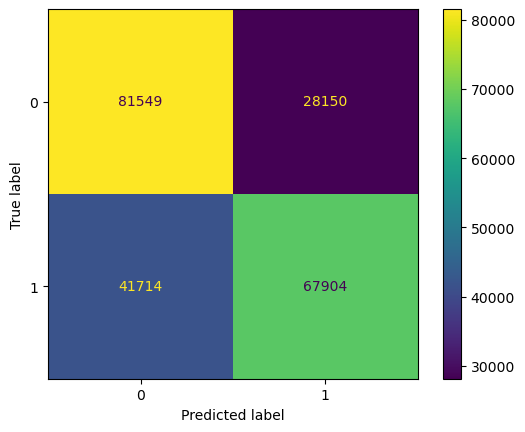

In [95]:
# Create and visualize confusion matrix
cm = metrics.confusion_matrix(os_Ytest, lr_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

### Undersampled dataset

In [96]:
# Train logistic regression classifier
classifier = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, max_iter=1000)
classifier.fit(us_Xtrain, us_Ytrain)

# Compute and print accuracy on training data
lr_train_predictions = classifier.predict(us_Xtrain)
lr_train_accuracy = classifier.score(us_Xtrain, us_Ytrain)
print('Training accuracy:',format( 100*lr_train_accuracy , '.2f') ) 

# Compute and print accuracy on the test data
lr_test_predictions = classifier.predict(us_Xtest)
lr_test_accuracy = classifier.score(us_Xtest, us_Ytest)
print('Testing accuracy:',format( 100*lr_test_accuracy , '.2f') ) 

# Compute and print AUC on test data
class_probabilities = classifier.predict_proba(us_Xtest)[:,1]
test_auc_score = metrics.roc_auc_score(us_Ytest, class_probabilities)
print('AUC value:', format( 100*test_auc_score , '.2f') )

Training accuracy: 68.69
Testing accuracy: 68.13
AUC value: 74.84


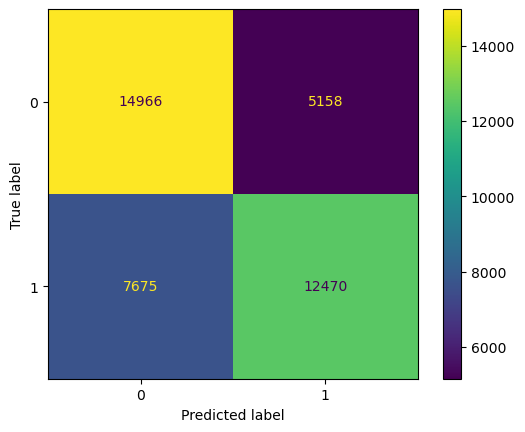

In [97]:
# Create and visualize confusion matrix
cm = metrics.confusion_matrix(us_Ytest, lr_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

### Imbalanced dataset

In [98]:
# Train logistic regression classifier
classifier = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, max_iter=1000)
classifier.fit(im_Xtrain, im_Ytrain)

# Compute and print accuracy on training data
lr_train_predictions = classifier.predict(im_Xtrain)
lr_train_accuracy = classifier.score(im_Xtrain, im_Ytrain)
print('Training accuracy:',format( 100*lr_train_accuracy , '.2f') ) 

# Compute and print accuracy on the test data
lr_test_predictions = classifier.predict(im_Xtest)
lr_test_accuracy = classifier.score(im_Xtest, im_Ytest)
print('Testing accuracy:',format( 100*lr_test_accuracy , '.2f') ) 

# Compute and print AUC on test data
class_probabilities = classifier.predict_proba(im_Xtest)[:,1]
test_auc_score = metrics.roc_auc_score(im_Ytest, class_probabilities)
print('AUC value:', format( 100*test_auc_score , '.2f') )

Training accuracy: 85.22
Testing accuracy: 85.19
AUC value: 74.17


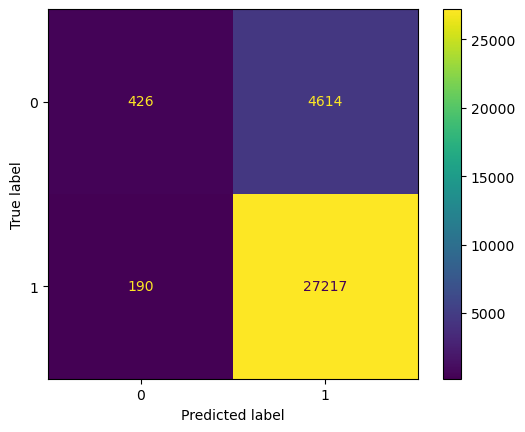

In [99]:
# Create and visualize confusion matrix
cm = metrics.confusion_matrix(im_Ytest, lr_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

## Train SVM

### OSF dataset

In [100]:
# Train SVM
clf = svm.LinearSVC(dual=False, max_iter=1000)
clf.fit(OSF_Xtrain, OSF_Ytrain)

# Compute and print accuracy on training data
svm_train_predictions = clf.predict(OSF_Xtrain)
print('Training accuracy:',format( metrics.accuracy_score(svm_train_predictions, OSF_Ytrain)*100 , '.2f') )

# Compute and print accurayc on testing data
svm_test_predictions = clf.predict(OSF_Xtest)
print('Testing accuracy:',format( metrics.accuracy_score(svm_test_predictions, OSF_Ytest)*100 , '.2f') )

Training accuracy: 80.58
Testing accuracy: 79.96


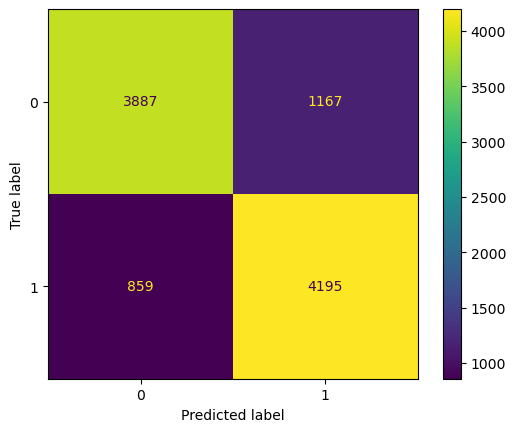

In [101]:
cm = metrics.confusion_matrix(OSF_Ytest, svm_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

### Oversampled dataset

In [102]:
# Train SVM
clf = svm.LinearSVC(dual=False, max_iter=1000)
clf.fit(os_Xtrain, os_Ytrain)

# Compute and print accuracy on training data
svm_train_predictions = clf.predict(os_Xtrain)
print('Training accuracy:',format( metrics.accuracy_score(svm_train_predictions, os_Ytrain)*100 , '.2f') )

# Compute and print accurayc on testing data
svm_test_predictions = clf.predict(os_Xtest)
print('Testing accuracy:',format( metrics.accuracy_score(svm_test_predictions, os_Ytest)*100 , '.2f') )

Training accuracy: 68.30
Testing accuracy: 68.06


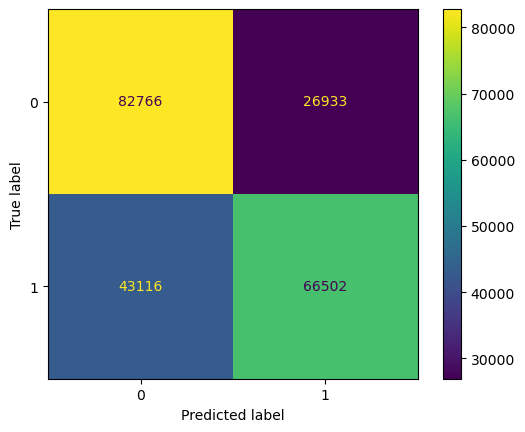

In [103]:
cm = metrics.confusion_matrix(os_Ytest, svm_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

### Undersampled dataset

In [104]:
# Train SVM
clf = svm.LinearSVC(dual=False, max_iter=1000)
clf.fit(us_Xtrain, us_Ytrain)

# Compute and print accuracy on training data
svm_train_predictions = clf.predict(us_Xtrain)
print('Training accuracy:',format( metrics.accuracy_score(svm_train_predictions, us_Ytrain)*100 , '.2f') )

# Compute and print accurayc on testing data
svm_test_predictions = clf.predict(us_Xtest)
print('Testing accuracy:',format( metrics.accuracy_score(svm_test_predictions, us_Ytest)*100 , '.2f') )

Training accuracy: 68.56
Testing accuracy: 68.05


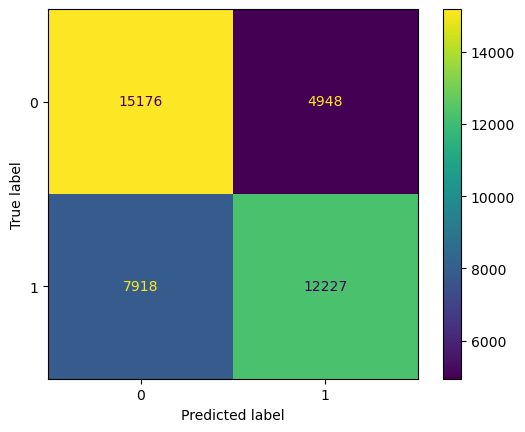

In [105]:
cm = metrics.confusion_matrix(us_Ytest, svm_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()

### Imbalanced dataset

In [106]:
# Train SVM
clf = svm.LinearSVC(dual=False, max_iter=1000)
clf.fit(im_Xtrain, im_Ytrain)

# Compute and print accuracy on training data
svm_train_predictions = clf.predict(im_Xtrain)
print('Training accuracy:',format( metrics.accuracy_score(svm_train_predictions, im_Ytrain)*100 , '.2f') )

# Compute and print accurayc on testing data
svm_test_predictions = clf.predict(im_Xtest)
print('Testing accuracy:',format( metrics.accuracy_score(svm_test_predictions, im_Ytest)*100 , '.2f') )

Training accuracy: 85.10
Testing accuracy: 85.09


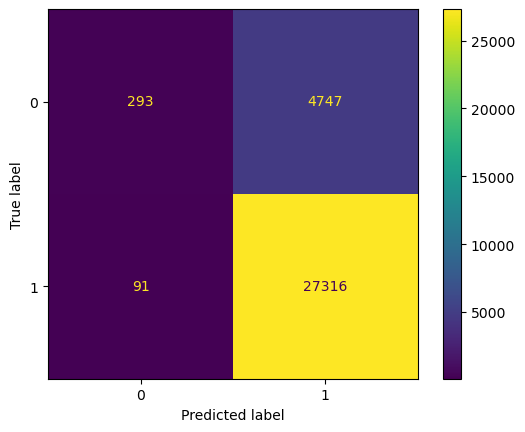

In [107]:
cm = metrics.confusion_matrix(im_Ytest, svm_test_predictions, labels=classifier.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()